Last report date: 2021-05-23


Text(0, 0.5, 'In Millions')

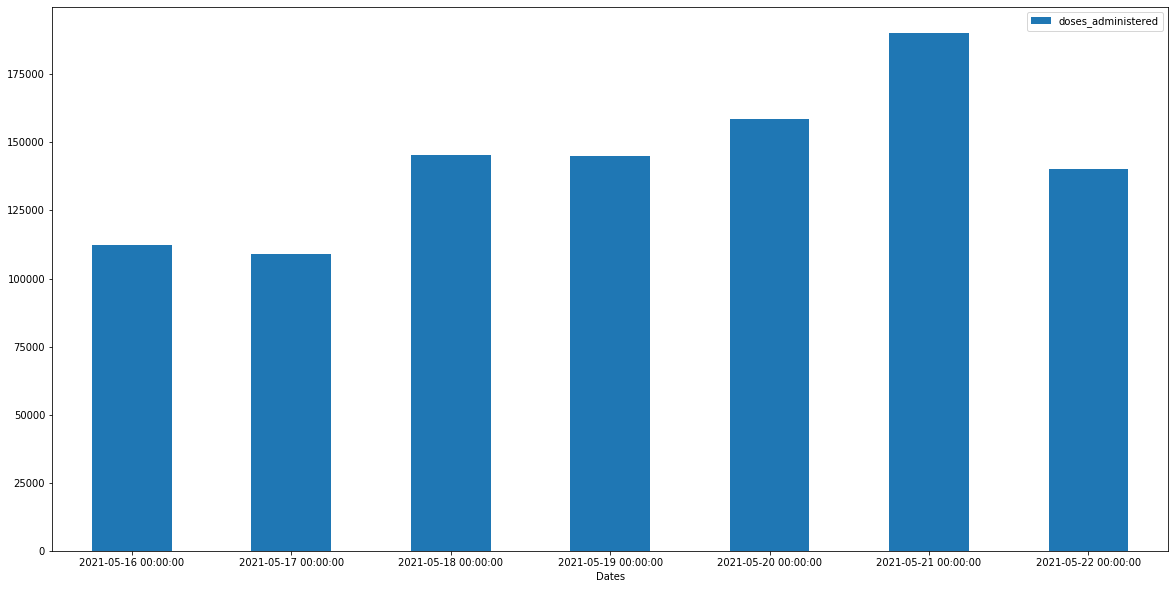

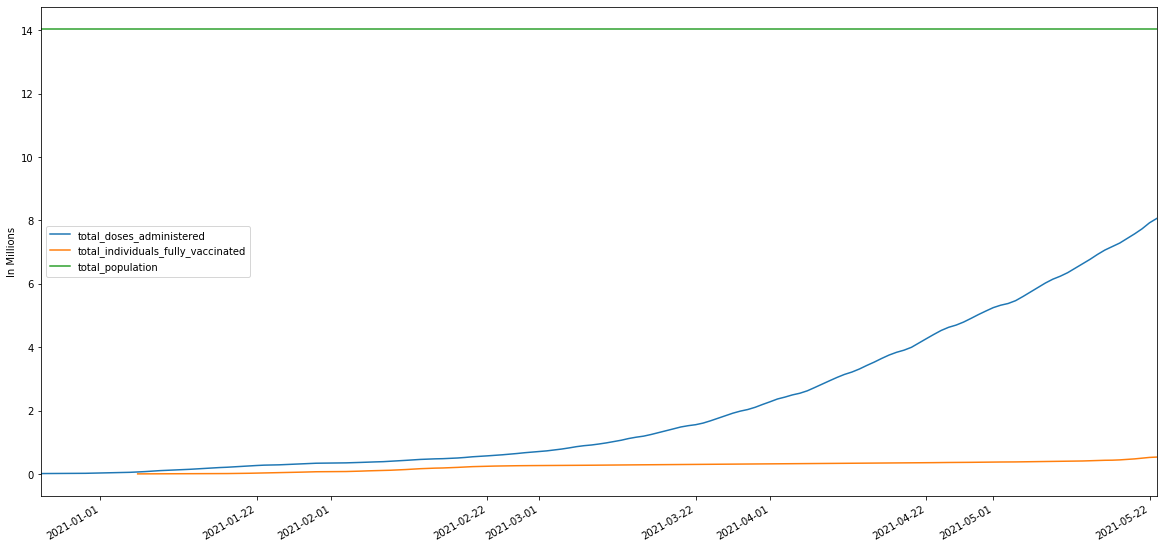

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import urllib
import matplotlib.pyplot as plt
import json
from itertools import repeat

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

stats = pd.read_csv("https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv")

dates = []
total_doses_administered = []
total_population_array = []

total_population = '14048273'
million_divisor = 1000000

report_date = None
previous_day_doses_administered = None

dates = stats.report_date.tolist()
total_doses_administered = stats.total_doses_administered.tolist()
total_individuals_fully_vaccinated = stats.total_individuals_fully_vaccinated.tolist()
total_population_array += len(total_doses_administered) * [total_population]
report_date = dates[-1]
previous_day_doses_administered = stats.previous_day_doses_administered.tolist()
    
dates = pd.to_datetime(dates, errors='coerce', format='%Y-%m-%dT%H:%M:%S')
start_date = pd.to_datetime(dates[0], errors='coerce', format='%Y-%m-%dT%H:%M:%S')
end_date = pd.to_datetime(dates[-1], errors='coerce', format='%Y-%m-%dT%H:%M:%S')

print("Last report date: " + str(report_date))

#print(dates)
#print(total_doses_administered)

df_total_doses_administered = pd.DataFrame({
   'total_doses_administered': total_doses_administered,
    'total_individuals_fully_vaccinated': total_individuals_fully_vaccinated,
    'total_population': total_population_array
   }, index = dates)


df_last_seven_days_records = pd.DataFrame({'Dates':[
    dates[-8],
    dates[-7],
    dates[-6],
    dates[-5],
    dates[-4],
    dates[-3],
    dates[-2],
], 'doses_administered':[
    int(previous_day_doses_administered[-7]),
    int(previous_day_doses_administered[-6]),
    int(previous_day_doses_administered[-5]),
    int(previous_day_doses_administered[-4]),
    int(previous_day_doses_administered[-3]),
    int(previous_day_doses_administered[-2]),
    int(previous_day_doses_administered[-1]),
]})

#df_total_doses_administered = df_total_doses_administered.apply(lambda x: x.astype(str).str.replace(',', ''))
df_total_doses_administered = df_total_doses_administered.astype(float)

df_total_doses_administered['total_doses_administered'] = df_total_doses_administered['total_doses_administered']/million_divisor
df_total_doses_administered['total_individuals_fully_vaccinated'] = df_total_doses_administered['total_individuals_fully_vaccinated']/million_divisor
df_total_doses_administered['total_population'] = df_total_doses_administered['total_population']/million_divisor

df_last_seven_days_records.plot.bar(x='Dates', y='doses_administered', rot=0, figsize=(20,10))

lines = df_total_doses_administered.plot(figsize=(20,10))
lines.set_ylabel("In Millions")




